In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/My projrct gen ai'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/8.jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/image (18).jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/image (11).jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/image (17).jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/image (30).jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/image (23).jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/image (27).jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/image (24).jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/image (28).jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/image (25).jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/image (16).jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/image (21).jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tumor/1.jpg
/content/drive/MyDrive/My projrct gen ai/Training/no_tum

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

FOLDER PATH

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../content/drive/MyDrive/My projrct gen ai/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('../content/drive/MyDrive/My projrct gen ai/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

Train test split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 577s 7s/step - accuracy: 0.2990 - loss: 4.4524 - val_accuracy: 0.2721 - val_loss: 1.3533
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 624s 7s/step - accuracy: 0.4078 - loss: 1.2678 - val_accuracy: 0.5408 - val_loss: 1.0341
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 568s 7s/step - accuracy: 0.5542 - loss: 1.0358 - val_accuracy: 0.5544 - val_loss: 0.9497
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 609s 7s/step - accuracy: 0.6582 - loss: 0.8374 - val_accuracy: 0.6293 - val_loss: 0.8430
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 561s 7s/step - accuracy: 0.6855 - loss: 0.7455 - val_accuracy: 0.6224 - val_loss: 0.8837
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 560s 7s/step - accuracy: 0.7306 - loss: 0.6688 - val_accuracy: 0.6565 - val_loss: 0.7737
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 562s 7s/step - accuracy: 0.7584 - loss: 0.5663 - val_accuracy: 0.7245 - val_loss: 0.6353
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 620s 7s/step - accuracy: 0.7717 - loss: 0.5438 - val_accuracy: 0.7041 - v

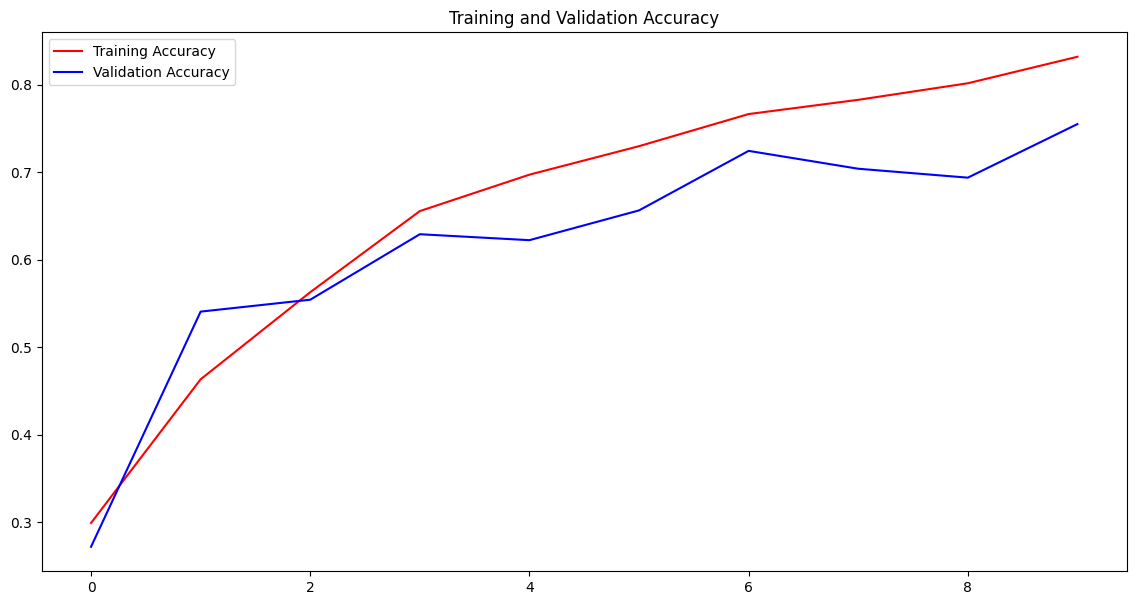

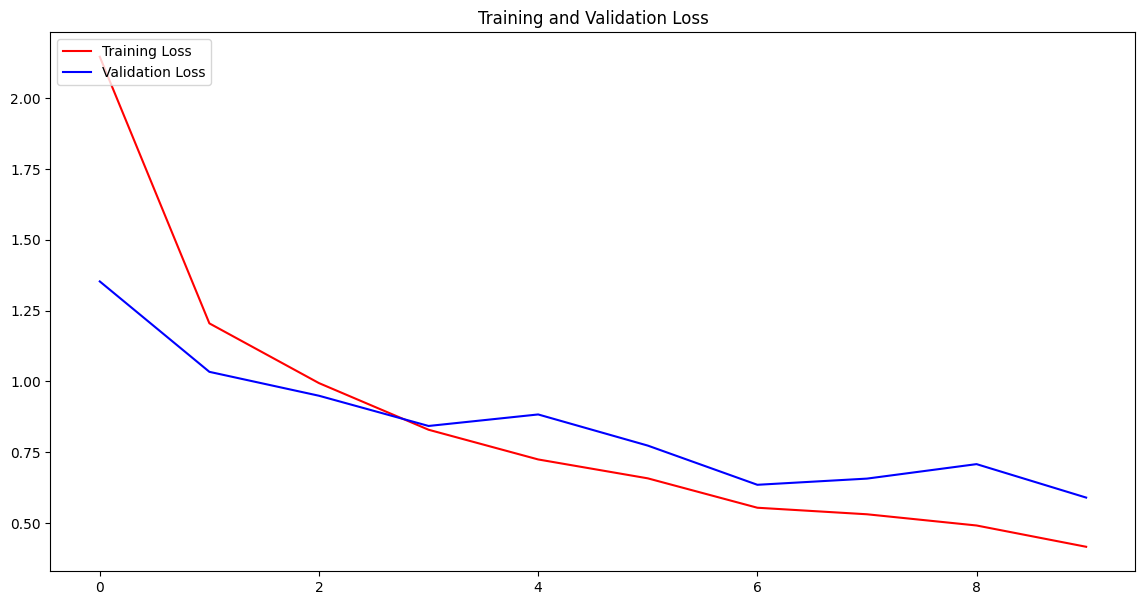

11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        93
           1       0.84      0.55      0.66        95
           2       0.80      0.92      0.86        52
           3       0.88      0.91      0.89        87

    accuracy                           0.78       327
   macro avg       0.80      0.80      0.79       327
weighted avg       0.79      0.78      0.78       327



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model definition
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Plot accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.figure(figsize=(14, 7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

# Plot loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend(loc='upper left')
plt.show()

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))
# Get final training metrics from history
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]


In [ ]:
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]

# Print final training accuracy and loss
print(f"\n✅ Final Training Accuracy: {final_train_accuracy * 100:.2f}%")
print(f"❌ Final Training Loss: {final_train_loss:.4f}")




✅ Final Training Accuracy: 83.20%
❌ Final Training Loss: 0.4165


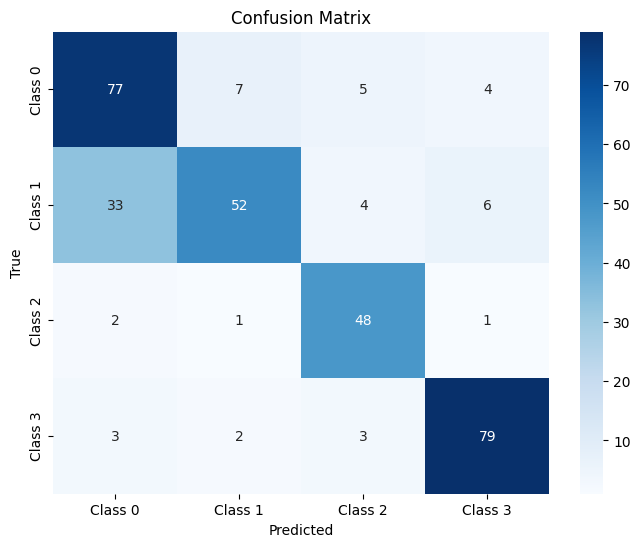

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# If you have class names, define them like this:
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Replace with your actual class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**LSTM + RNN (proposed model)**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100, 64)        │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,889 (148.00 KB)

 Trainable params: 37,889 (148.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.4759 - loss: 0.7064 - val_accuracy: 0.5000 - val_loss: 0.7145
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.4846 - loss: 0.7093 - val_accuracy: 0.5000 - val_loss: 0.7160
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5310 - loss: 0.6971 - val_accuracy: 0.5150 - val_loss: 0.6954
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5538 - loss: 0.6851 - val_accuracy: 0.5000 - val_loss: 0.6948
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.5332 - loss: 0.6953 - val_accuracy: 0.5150 - val_loss: 0.6951
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.5674 - loss: 0.6842 - val_accuracy: 0.5100 - val_loss: 0.6996
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5928 - loss: 0.6813 - val_accuracy: 0.5100 - val_loss: 0.7005
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.5820 - loss: 0.6718 - val_accuracy: 0.4750 - 

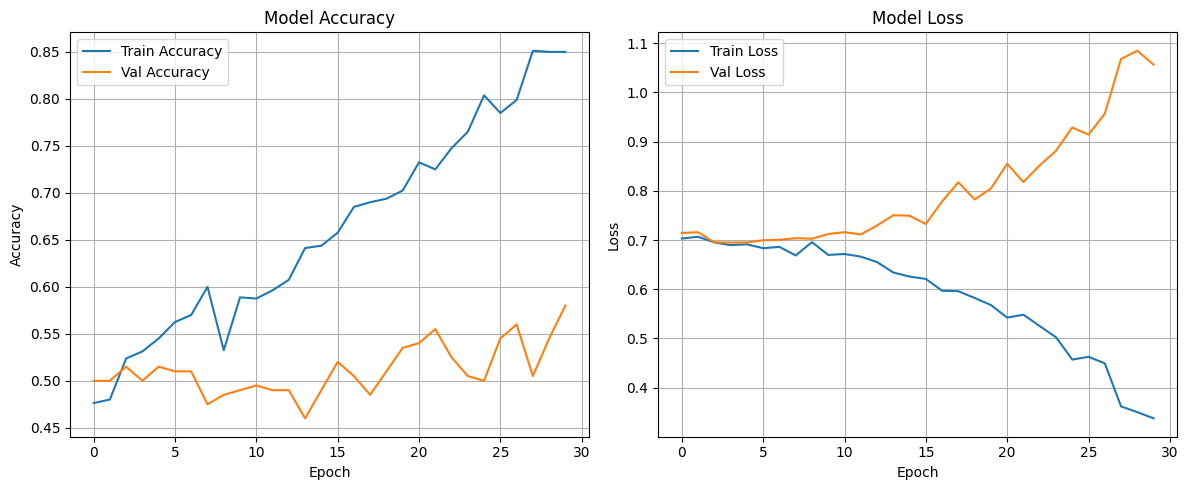

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       480
           1       0.87      0.86      0.86       520

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



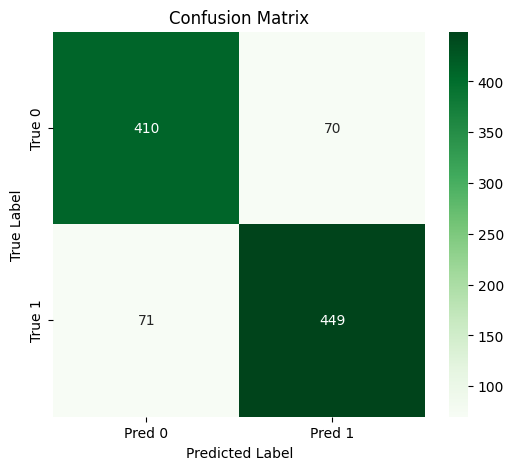

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Simulated data (replace with your actual dataset)
X = np.random.rand(1000, 100, 10)  # 1000 samples, 100 timesteps, 10 features
y = np.random.randint(0, 2, 1000)  # Binary labels (0 or 1)

# 2. Define the LSTM + RNN model
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(100, 10)),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 3. Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. Model summary
model.summary()

# 5. Train the model
history = model.fit(X, y, epochs=30, batch_size=32, validation_split=0.2)

# 6. Evaluate on full data (for demo)
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"\n✅ Final Training Accuracy: {accuracy:.4f}")
print(f"✅ Final Training Loss: {loss:.4f}")

# 7. Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 8. Predictions
y_pred_prob = model.predict(X)
y_pred = (y_pred_prob > 0.5).astype("int32")

# 9. Classification report
print("\n📋 Classification Report:")
print(classification_report(y, y_pred))

# 10. Confusion matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMAGE DETECTION**

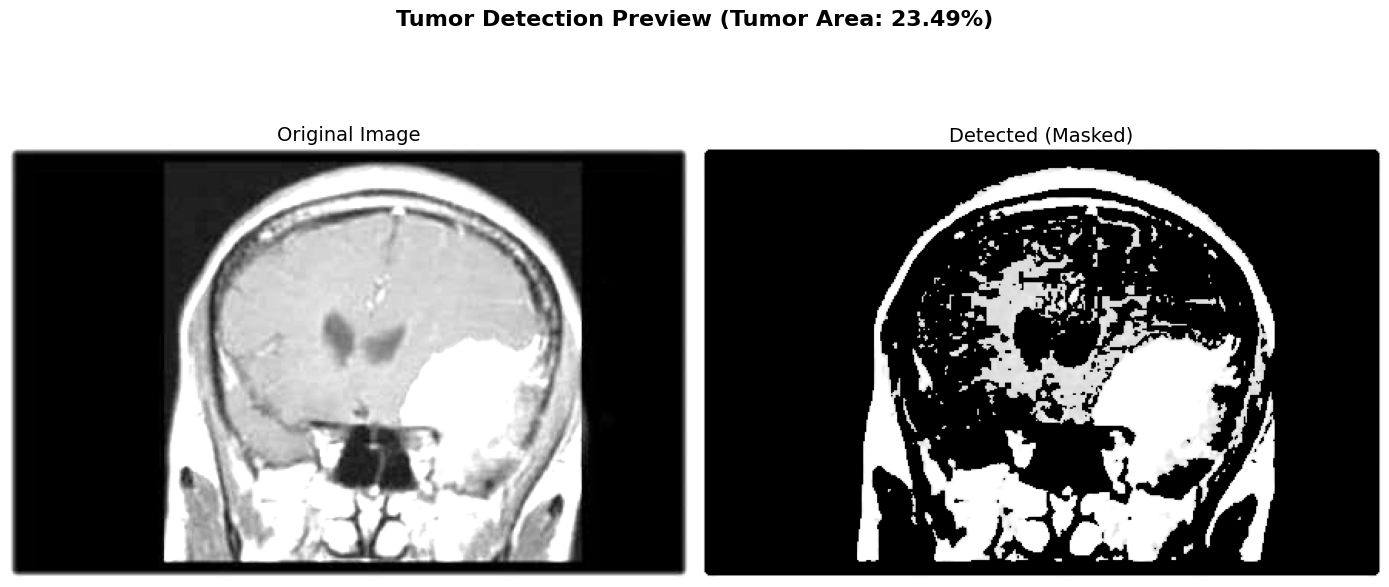

Image saved as EPS at: /content/drive/MyDrive/My projrct gen ai/Testing/meningioma_tumor/image(1).eps


In [ ]:
import os
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
BRIGHTNESS_FACTOR = 1.7
GRID_SIZE = 10  # for 10x10 grid = 100 segments

# 🔧 Replace these with your actual image and mask file paths
image_path = '/content/drive/MyDrive/My projrct gen ai/Testing/meningioma_tumor/image(1).jpg'
mask_path = '/content/drive/MyDrive/My projrct gen ai/Testing/meningioma_tumor/image(1).jpg'  # Replace if separate

# Load and enhance image
image = Image.open(image_path).convert('RGB')
image = ImageEnhance.Brightness(image).enhance(BRIGHTNESS_FACTOR)

# Load mask
mask = Image.open(mask_path).convert('L')
mask = mask.resize(image.size, Image.Resampling.LANCZOS)

# Convert to NumPy arrays
image_np = np.array(image)
mask_np = np.array(mask)
binary_mask = mask_np > 127

# Apply binary mask
masked_image = np.zeros_like(image_np)
masked_image[binary_mask] = image_np[binary_mask]

# Calculate tumor percentage
tumor_pixel_count = np.sum(binary_mask)
total_pixel_count = binary_mask.size
tumor_percentage = (tumor_pixel_count / total_pixel_count) * 100

# Set up plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
titles = ["Original Image", "Detected (Masked)"]
images = [image_np, masked_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=14)
    ax.axis('off')

# Title and show
fig.suptitle(f"Tumor Detection Preview (Tumor Area: {tumor_percentage:.2f}%)", fontsize=16, fontweight='bold')
plt.tight_layout()
sns.despine()

# Save the figure as an EPS file
output_eps_path = '/content/drive/MyDrive/My projrct gen ai/Testing/meningioma_tumor/tumor_detection_preview.eps'
plt.savefig(output_eps_path, format='eps')

# Show the plot
plt.show()
from PIL import Image
import os

# Replace this with your actual image path
input_image_path = '/content/drive/MyDrive/My projrct gen ai/Testing/meningioma_tumor/image(1).jpg'

# Open the image
image = Image.open(input_image_path).convert('RGB')

# Define the EPS output path, ensure the directory exists
output_folder = '/content/drive/MyDrive/My projrct gen ai/Testing/meningioma_tumor/'  # Use an existing directory
base_name = os.path.splitext(os.path.basename(input_image_path))[0]
output_eps_path = os.path.join(output_folder, f'{base_name}.eps')

# Save the image in EPS format
image.save(output_eps_path, format='EPS')

print(f"Image saved as EPS at: {output_eps_path}")


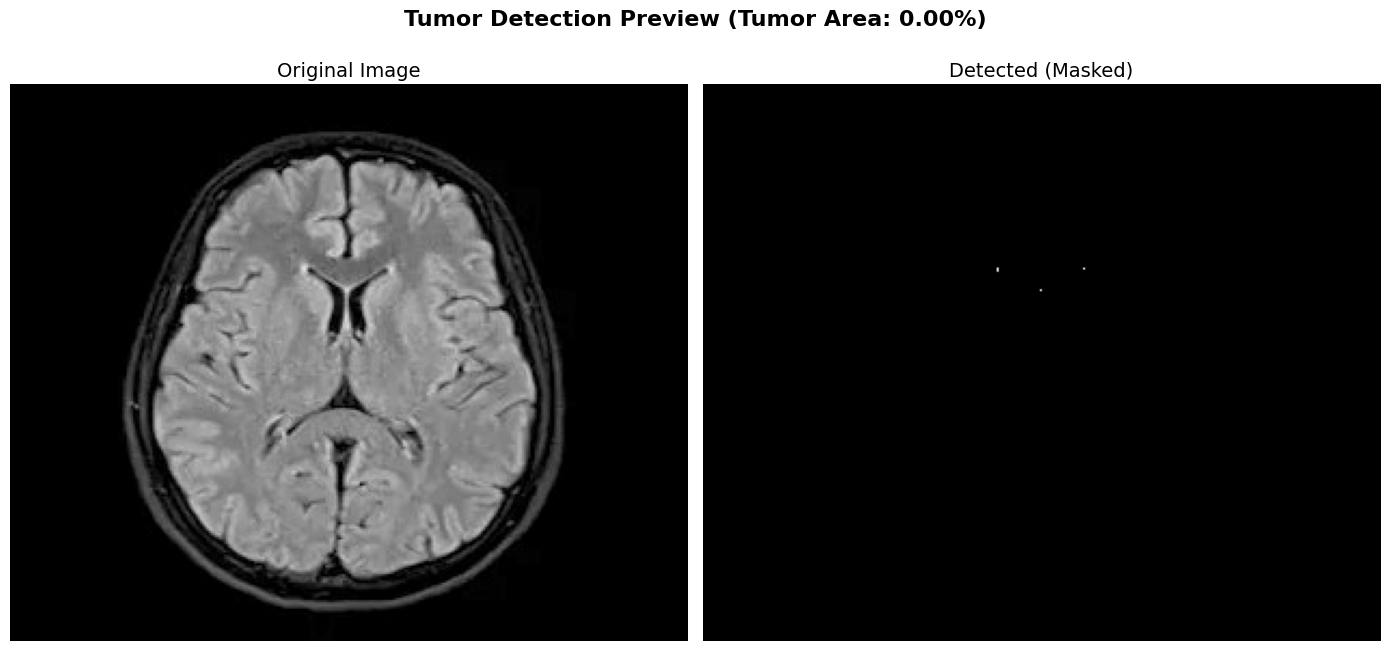

Image saved as EPS at: /content/drive/MyDrive/My projrct gen ai/Testing/no_tumor/image(100).eps


In [ ]:
import os
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
BRIGHTNESS_FACTOR = 1.7
GRID_SIZE = 10  # for 10x10 grid = 100 segments

# 🔧 Replace these with your actual image and mask file paths
image_path = '/content/drive/MyDrive/My projrct gen ai/Testing/no_tumor/image(100).jpg'
mask_path = '/content/drive/MyDrive/My projrct gen ai/Testing/no_tumor/image(100).jpg'  # Replace if separate

# Load and enhance image
image = Image.open(image_path).convert('RGB')
image = ImageEnhance.Brightness(image).enhance(BRIGHTNESS_FACTOR)

# Load mask
mask = Image.open(mask_path).convert('L')
mask = mask.resize(image.size, Image.Resampling.LANCZOS)

# Convert to NumPy arrays
image_np = np.array(image)
mask_np = np.array(mask)
binary_mask = mask_np > 127

# Apply binary mask
masked_image = np.zeros_like(image_np)
masked_image[binary_mask] = image_np[binary_mask]

# Calculate tumor percentage
tumor_pixel_count = np.sum(binary_mask)
total_pixel_count = binary_mask.size
tumor_percentage = (tumor_pixel_count / total_pixel_count) * 100

# Set up plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
titles = ["Original Image", "Detected (Masked)"]
images = [image_np, masked_image]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=14)
    ax.axis('off')

# Title and show
fig.suptitle(f"Tumor Detection Preview (Tumor Area: {tumor_percentage:.2f}%)", fontsize=16, fontweight='bold')
plt.tight_layout()
sns.despine()

# Save the figure as an EPS file
# Updated line: Added filename to the directory path
output_eps_path = '/content/drive/MyDrive/My projrct gen ai/Testing/no_tumor/tumor_detection_preview.eps'
plt.savefig(output_eps_path, format='eps')

# Show the plot
plt.show()
from PIL import Image
import os

# Replace this with your actual image path
input_image_path = '/content/drive/MyDrive/My projrct gen ai/Testing/no_tumor/image(100).jpg'

# Open the image
image = Image.open(input_image_path).convert('RGB')

# Define the EPS output path, ensure the directory exists
output_folder = '/content/drive/MyDrive/My projrct gen ai/Testing/no_tumor'  # Use an existing directory
base_name = os.path.splitext(os.path.basename(input_image_path))[0]
output_eps_path = os.path.join(output_folder, f'{base_name}.eps')

# Save the image in EPS format
image.save(output_eps_path, format='EPS')

print(f"Image saved as EPS at: {output_eps_path}")